<a href="https://colab.research.google.com/github/Venkata-Sai-Prakash-Yerramsetti/CMPE257-Fall23-Venkata-Sai-Prakash-Yerramsetti/blob/homework-2/ML_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#### CREDITS: Wencen Wu ####
import numpy as np

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    x1 = x1
    y1 = y1

    # center of the bottom semi-circle
    x2 = x1 + rad + thk / 2
    y2 = y1 - sep

    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []

    # parameters
    r1 = rad + thk
    r2 = rad

    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)

        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([x1 + x,y1 + y])
                cnt += 1
            else:
                bottom.append([x2 + x,y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

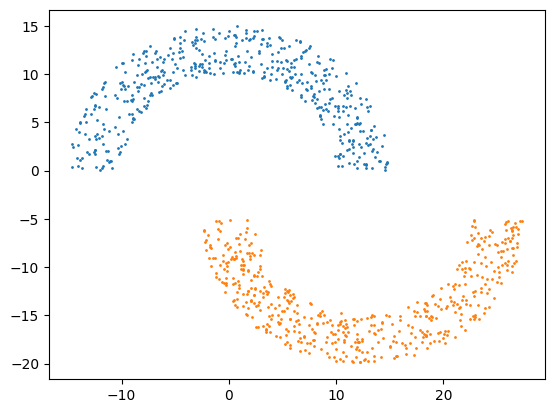

In [19]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,1000)
x1 = [i[0] for i in top]
y1 = [i[1] for i in top]

x2 = [i[0] for i in bottom]
y2 = [i[1] for i in bottom]

plt.scatter(x1,y1,s = 1)
plt.scatter(x2,y2,s = 1)

In [20]:
import pandas as pd
df1=pd.DataFrame(top, columns=["x1","x2"])
df1["y"]=1
df2=pd.DataFrame(bottom,columns=["x1","x2"])
df2["y"]=-1
df=pd.concat([df1,df2])
df.head()

,x1,x2,y
0,-1.474959,13.778728,1
1,-7.369093,7.779051,1
2,6.756302,11.902015,1
3,8.285692,11.904122,1
4,7.186932,8.472561,1


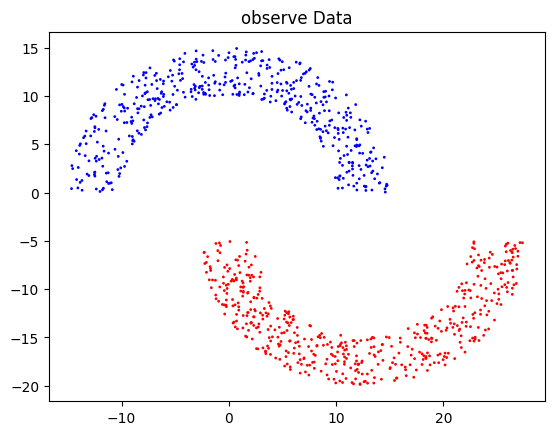

In [21]:
colors = ['blue' if i == 1 else 'red' for i in df.y]
plt.scatter(df.x1, df.x2, s=1, c=colors)
plt.title("observe Data")
plt.show()

## Task 2 LP 1

In [22]:
df['x0'] = 1
x = df[['x0', 'x1', 'x2']].values
y = df['y'].values
def plaalgorithm(x, y, num_iter=1000):
    weight = np.zeros(x.shape[1])
    for i in range(num_iter):
        missclassified = 0
        for j in range(len(x)):
            if y[j] * np.dot(x[j], weight) <= 0:
                weight += y[j] * x[j]
                missclassified += 1
        if missclassified == 0:
            break
        print(f"iteration:{i+1} , weight{weight},missclassified: {missclassified}")
    return weight, missclassified
weight,missclassified = plaalgorithm(x, y)
def eval(weight, x, y):
    predict = np.sign(np.dot(x, weight))
    accuracy = np.mean(predict == y)
    return accuracy
accuracy=eval(weight,x,y)
print(f"suitable weight: {weight}, missclassified: {missclassified}, Accuracy: {accuracy*100} %")

iteration:1 , weight[14.         -0.87537963 36.38070936],missclassified: 14
suitable weight: [14.         -0.87537963 36.38070936], missclassified: 0, Accuracy: 100.0 %


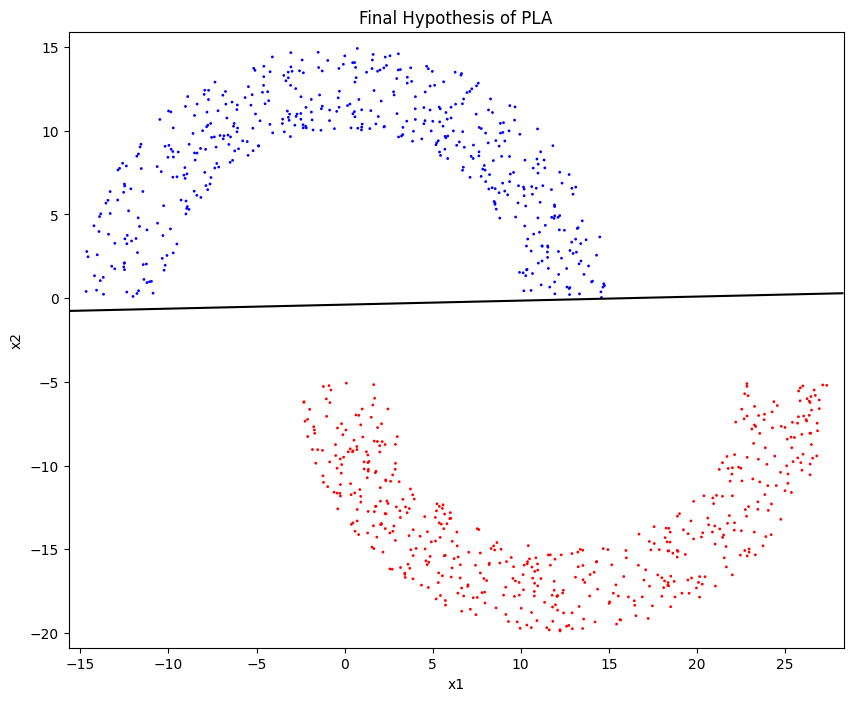

In [23]:
def plot(weight):
  x1 = df.x1
  x2 = df.x2
  target = df.y
  plt.figure(figsize=(10, 8))
  colors = ['blue' if i == 1 else 'red' for i in df.y]
  plt.scatter(df.x1, df.x2, s=1, c=colors)
  x1_min, x1_max = x1.min() - 1, x1.max() + 1
  x2_min, x2_max = x2.min() - 1, x2.max() + 1
  x, y = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
  Z = np.dot(np.c_[np.ones_like(x.ravel()), x.ravel(), y.ravel()], weight)
  Z = Z.reshape(x.shape)
  plt.contour(x, y, Z, levels=[0], colors="black", linestyles='-')
  plt.title("Final Hypothesis of PLA")
  plt.xlabel('x1')
  plt.ylabel('x2')

  plt.show()
plot(weight)

## LP1 Q-B

In [24]:
x_T=np.transpose(x)
x_T_x=np.matmul(x_T,x)
x_inv=np.linalg.inv(x_T_x)
weight1=np.matmul(x_inv, x_T)
weight1=np.matmul(weight1,y)
print(f"weight of LR's:{weight1}")

weight of LR's:[ 0.24378654 -0.0081013   0.07875773]


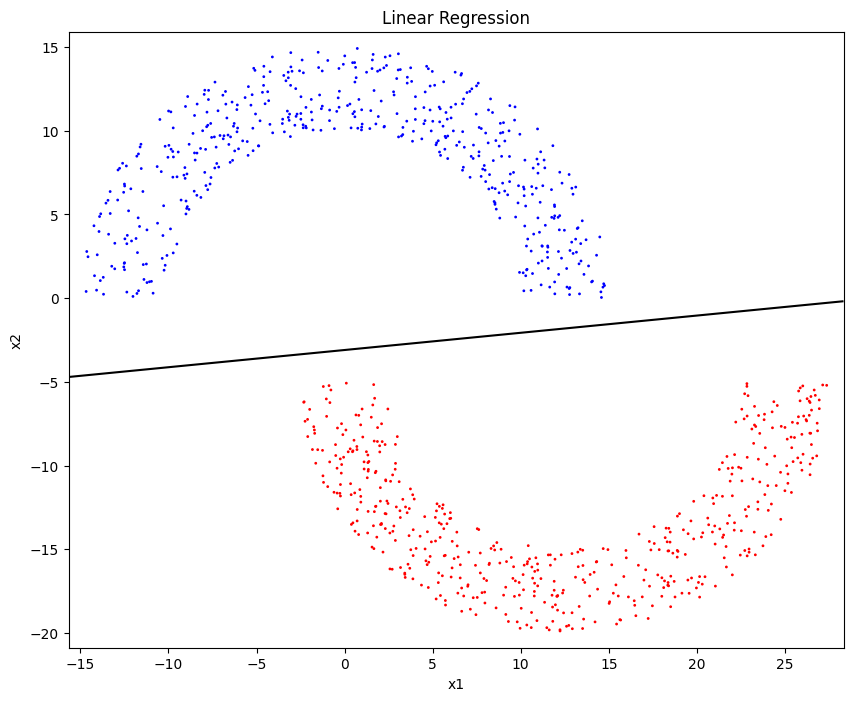

In [25]:
final_weight = weight1
x1 = df.x1
x2 = df.x2
target = df.y
plt.figure(figsize=(10, 8))
plt.scatter(df.x1, df.x2, s=1, c=colors)
x1_min, x1_max = x1.min() - 1, x1.max() + 1
x2_min, x2_max = x2.min() - 1, x2.max() + 1
x, y = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = np.dot(np.c_[np.ones_like(x.ravel()), x.ravel(), y.ravel()], weight1)
Z = Z.reshape(x.shape)
plt.contour(x, y, Z, levels=[0], colors="black", linestyles='-')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Linear Regression")
plt.show()

According to the observations on the data from the PLA and linear regression, both methods classify the target with 100% accuracy. But when compared to pocket, linear regression offers higher data separability and appears to have lower out-of-sample error.

##LP 2

In [26]:
#### CREDITS: Wencen Wu ####
import numpy as np

#parameters
rad = 10
thk = 5
sep = -5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    x1 = x1
    y1 = y1

    # center of the bottom semi-circle
    x2 = x1 + rad + thk / 2
    y2 = y1 - sep

    # data points in the top semi-circle
    up = []
    # data points in the bottom semi-circle
    down = []

    # parameters
    r1 = rad + thk
    r2 = rad

    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)

        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                up.append([x1 + x,y1 + y])
                cnt += 1
            else:
                down.append([x2 + x,y2 + y])
                cnt += 1
        else:
            continue

    return up,down

Text(0.5, 1.0, 'modified Data')

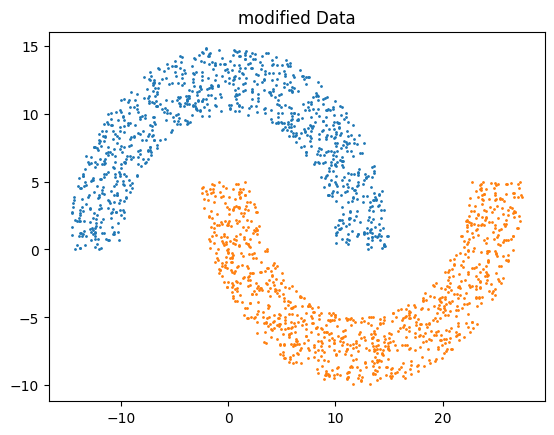

In [27]:
up,down = generatedata(rad,thk,sep,2000)
x1 = [i[0] for i in up]
y1 = [i[1] for i in up]

x2 = [i[0] for i in down]
y2 = [i[1] for i in down]

plt.scatter(x1,y1,s = 1)
plt.scatter(x2,y2,s = 1)
plt.title("modified Data")

## LP 2 Q-A

In [28]:
df100=pd.DataFrame(up, columns=["x1","x2"])
df100["y"]=1
df200=pd.DataFrame(down,columns=["x1","x2"])
df200["y"]=-1
new_df=pd.concat([df100,df200])
new_df['x0'] = 1
x_new = new_df[['x0', 'x1', 'x2']].values
y_new = new_df['y'].values
weight_new,missclassified_n = plaalgorithm(x_new, y_new,1000)
def eval(weight_new, x_new, y_new):
    predict = np.sign(np.dot(x_new, weight_new))
    accuracy = np.mean(predict == y_new)
    return accuracy
accuracy=eval(weight_new,x_new,y_new)
print(f"Best weight: {weight_new}, Number of missclassified: {missclassified_n}, Accuracy: {accuracy*100} %")

iteration:1 , weight[-15.          -7.75708356  -1.79275965],missclassified: 37
iteration:2 , weight[-20.         -10.85471911  -3.04432494],missclassified: 55
iteration:3 , weight[-21.         -11.70880875  -5.71074053],missclassified: 55
iteration:4 , weight[-16.         -8.7529164  -1.9947612],missclassified: 51
iteration:5 , weight[-20.         -12.89313563  -4.8372003 ],missclassified: 50
iteration:6 , weight[-20.         -11.77045829  -3.79814884],missclassified: 42
iteration:7 , weight[-23.         -14.53255548  -4.57520595],missclassified: 49
iteration:8 , weight[-21.         -12.19474207  -4.55108878],missclassified: 52
iteration:9 , weight[-22.         -13.33948398  -6.31443901],missclassified: 51
iteration:10 , weight[-24.         -13.91358718  -6.16665723],missclassified: 56
iteration:11 , weight[-24.         -12.51239604  -6.79352434],missclassified: 50
iteration:12 , weight[-23.         -13.38729284  -5.51119441],missclassified: 53
iteration:13 , weight[-21.         -12.4

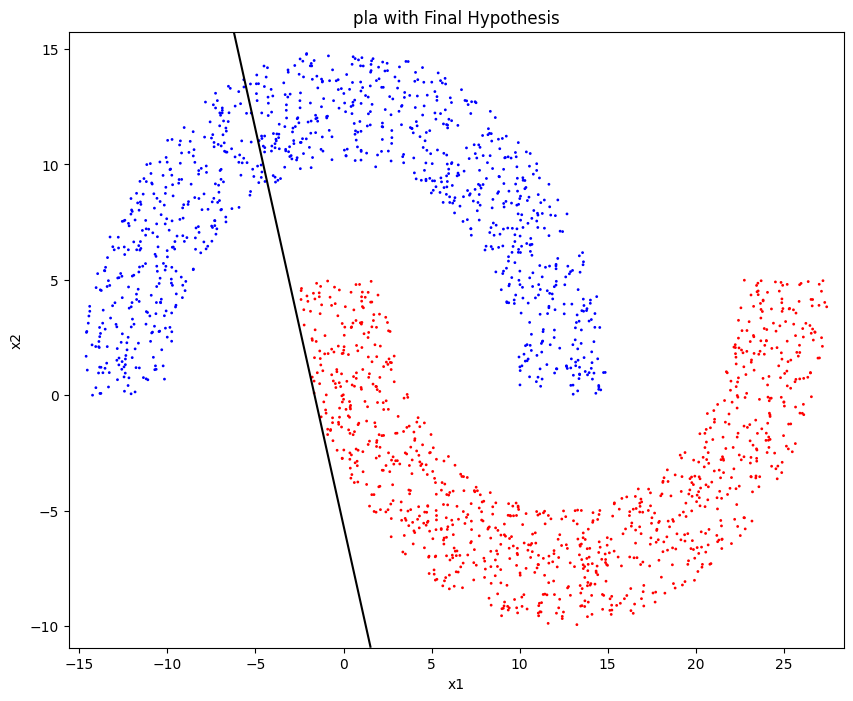

In [29]:
def plots(weight,title):
  x1 = new_df.x1
  x2 = new_df.x2
  target = new_df.y
  plt.figure(figsize=(10, 8))
  colors = ['blue' if i == 1 else 'red' for i in new_df.y]
  plt.scatter(new_df.x1, new_df.x2, s=1, c=colors)
  x1_min, x1_max = x1.min() - 1, x1.max() + 1
  x2_min, x2_max = x2.min() - 1, x2.max() + 1
  x, y = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
  Z = np.dot(np.c_[np.ones_like(x.ravel()), x.ravel(), y.ravel()], weight)
  Z = Z.reshape(x.shape)
  plt.contour(x, y, Z, levels=[0], colors="black", linestyles='-')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.title(title)
  plt.show()
plots(weight_new,"pla with Final Hypothesis")

When dealing with nonlinearly separable data, the Pla will iteratively change the weights until it detects all correctly classified points, which it does in this instance. So, in order to make it simpler and give it the most weight possible, I've changed the maximum iterations to 1000.


## LP 2 Q- B

best weight: [-60.           6.24065916  34.46763125]


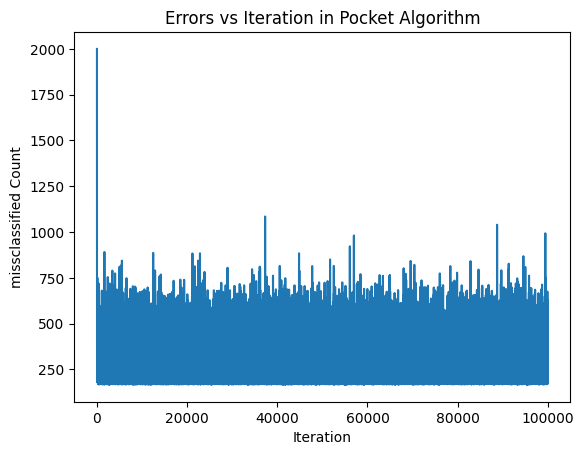

 LP 2 Q-C


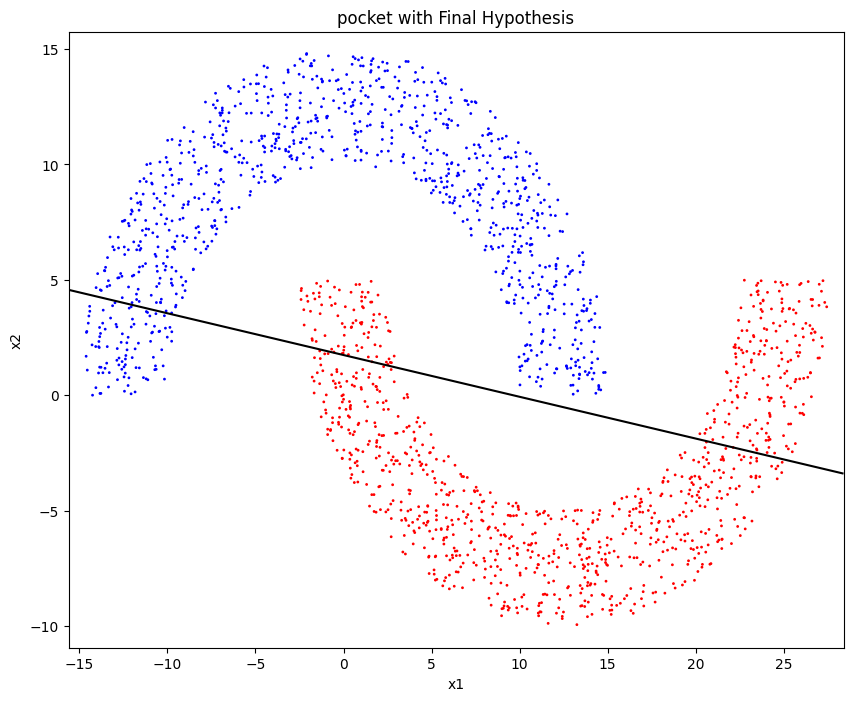

CPU times: user 7.09 s, sys: 178 ms, total: 7.26 s
Wall time: 7.42 s


In [30]:
%%time
def pocket_algorithm(x, y, num_of_iterations):
    rows, variables = x.shape
    paticular_weight = np.zeros(variables)
    pocket_weight = np.zeros(variables)
    missclassifiedified_ex = rows
    missclassified_ex = []
    for iteration in range(num_of_iterations):
        predictions = np.sign(np.dot(x, paticular_weight))
        missclassifiedified = np.where(predictions != y)[0]
        if missclassifiedified.size == 0:
            break
        random_missclassifiedified = np.random.choice(missclassifiedified)
        paticular_weight += y[random_missclassifiedified] * x[random_missclassifiedified]
        missclassified_size = missclassifiedified.size
        missclassified_ex.append(missclassified_size)
        if missclassified_size < missclassifiedified_ex:
            missclassifiedified_ex = missclassified_size
            pocket_weight = paticular_weight.copy()
    return pocket_weight, missclassified_ex
num_of_iterations = 100000
final_weight, error_counts = pocket_algorithm(x_new, y_new, num_of_iterations)
print("best weight:", final_weight)
y=[i for i in error_counts]
x=[i for i in range(1,100001)]
plt.plot(range(len(error_counts)), error_counts, linestyle='-')
plt.xlabel("Iteration")
plt.ylabel("missclassified Count")
plt.title("Errors vs Iteration in Pocket Algorithm")
plt.show()
print(" LP 2 Q-C")
plots(final_weight,"pocket with Final Hypothesis")

##LP 2 Q-C

Linear Regression weights:[-0.12012137 -0.02257695  0.10260115]


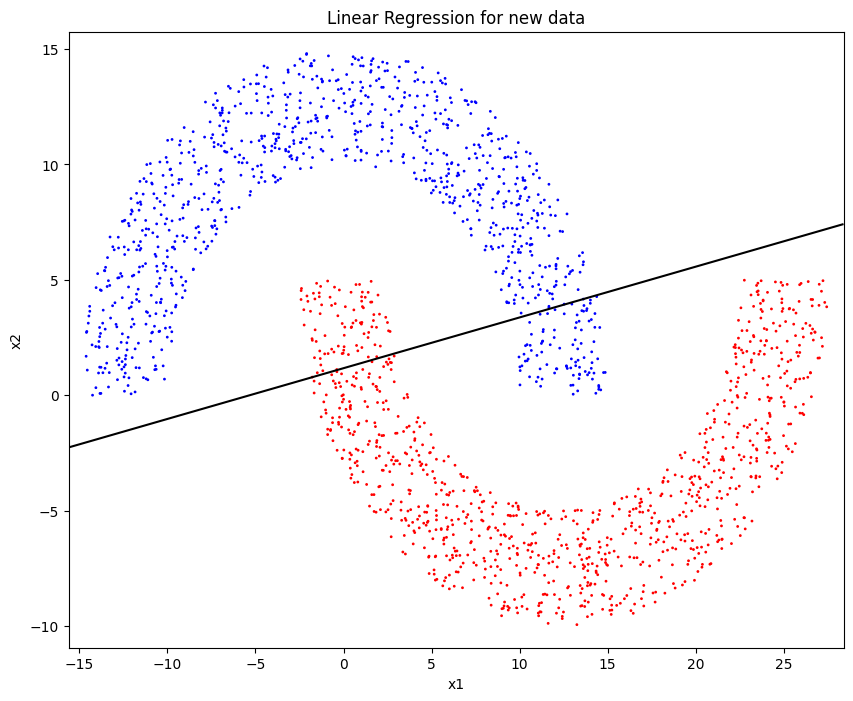

CPU times: user 434 ms, sys: 67.5 ms, total: 502 ms
Wall time: 576 ms


In [31]:
%%time
x_T_new=np.transpose(x_new)
x_T_x_new=np.matmul(x_T_new,x_new)
x_inv_n=np.linalg.inv(x_T_x_new)
weight1_n=np.matmul(x_inv_n, x_T_new)
weight1_n=np.matmul(weight1_n,y_new)
print(f"Linear Regression weights:{weight1_n}")
plots(weight1_n, "Linear Regression for new data")

When comparing time consumption, linear regression performs significantly better, taking 2.08ms as opposed to 4.6s for pocket. The fact that the data cannot be separated linearly prevents either technique from offering the best possible result. However, linear regression offers a superior advantage because we used a random selection of misclassified data to update the weight and cut down on calculation time.


## Task 3 LP 1

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as pathces
from google.colab import drive
drive.mount('/content/drive')
training_data = pd.read_csv('/content/drive/MyDrive/datasets/ZipDigits_train.csv',header=None,delim_whitespace=True)
test_data = pd.read_csv('/content/drive/MyDrive/datasets/ZipDigits_test.csv',header=None,delim_whitespace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
training_data=training_data[(training_data[0]==1) |(training_data[0]==5)]
training_data=training_data.reset_index(drop=True)
training_data[0]=training_data[0].apply(lambda x:1 if x==1 else-1)
test_data=test_data[(test_data[0]==1) |(test_data[0]==5)]
test_data=test_data.reset_index(drop=True)
test_data[0]=test_data[0].apply(lambda x:1 if x==1 else-1)

In [34]:
def inten(image):
  inten= np.sum(image[1:])
  return inten
def symm(image):
  image=np.array(image).reshape(1,257)
  left=image[:,1:129]
  right=image[:,129:]
  symm=np.sum(np.abs(left-np.flip(right)))
  return symm
training_data['symm']=training_data.apply(symm,axis=1)
test_data['symm']=test_data.apply(symm,axis=1)
training_data['inten']=training_data.apply(inten,axis=1)
test_data['inten']=test_data.apply(inten,axis=1)
symm_arr=np.array(training_data['symm'])
inten=np.array(training_data['inten'])
symm_arr_t=np.array(test_data['symm'])
inten_t=np.array(test_data['inten'])
length = len(symm_arr_t)
intercept = np.ones((length, 1), dtype=symm_arr_t.dtype)
x1_test=np.vstack((inten_t, symm_arr_t.T))
x_test_data=np.concatenate((intercept, x1_test.T), axis=1)
y_test_data=np.array(test_data[0])


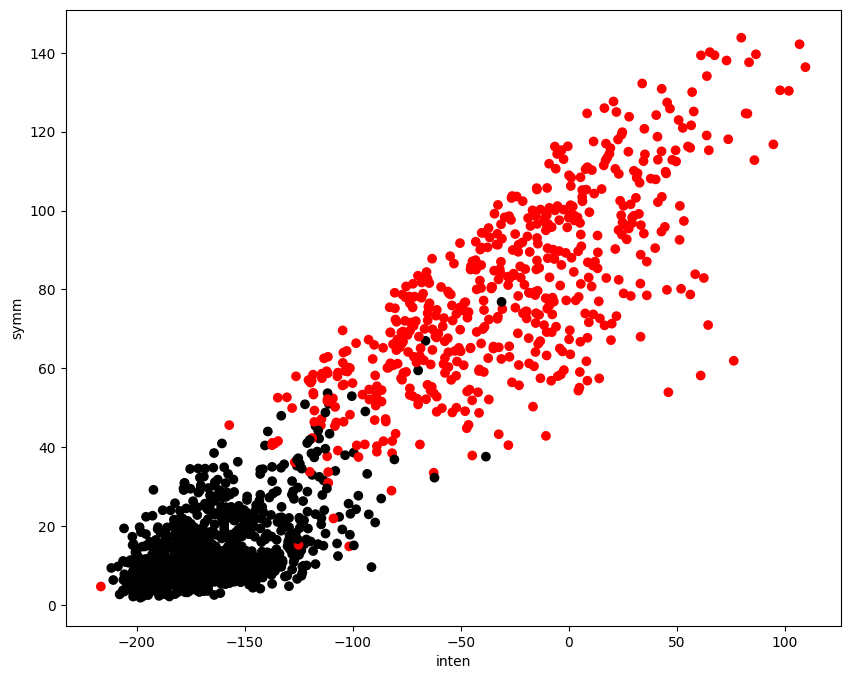

In [35]:
length = len(symm_arr)
new_column = np.ones((length, 1), dtype=symm_arr.dtype)
x1=np.vstack((inten, symm_arr))
x=np.concatenate((new_column, x1.T), axis=1)
y=np.array(training_data[0])
clr=training_data[0].map({1:"black",-1:"red"})
plt.figure(figsize=(10, 8))
plt.scatter(training_data['inten'],training_data['symm'],c=clr,label=['1','-1'])
plt.xlabel('inten')
plt.ylabel('symm')
plt.show()

In [36]:
def calc_wtx(w,x):
  return np.sign(np.dot(w,np.transpose(x)))
def missclassified(w,x,y):
  predictions = calc_wtx(w, x)
  return np.sum(predictions != y)
def plotfunc(w,clr,algo):
  m=-w[1] / w[2]
  c = -w[0] / w[2]
  axes=plt.gca()
  xx = np.array(axes.get_xlim())
  yy = m*xx+c
  plt.title("Final Hypothesis "+algo)
  plt.plot(xx, yy, color=clr)

The final weights:  [  11.    -207.562 -485.542]
Total number of missclassifiedified: 15


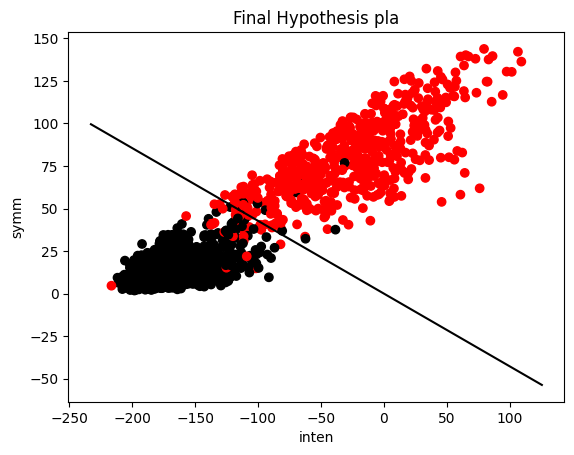

In [37]:
count=0
w=np.array([0,0,0], dtype=float)
plt.scatter(training_data['inten'],training_data['symm'],c=clr,label=['1','-1'])
plt.xlabel('inten')
plt.ylabel('symm')
while count<=1000:
  for i in range(0,len(x)):
    if (y[i]!= np.sign(np.dot(w,np.transpose(x[i])))):
      w+=x[i]*float(y[i])
      count+=1
      if(missclassified(w,x,y)==0):
        break
print('The final weights: ', w)
plotfunc(w,"black","pla")
error_digits_pla_test=missclassified(w,x_test_data,y_test_data)
print(f"Total number of missclassifiedified: {error_digits_pla_test}")

In [38]:
def pocket(x,y,max_iter):
    j = 0
    error = []
    w=np.zeros(x[0].shape)
    best_w = np.copy(w)
    best_error = missclassified(w, x, y)
    while j <= max_iter:
        j += 1
        pred = calc_wtx(best_w, x)
        missclassifiedified_ind = np.where(pred != y)[0]
        error.append(missclassified(best_w,x,y))
        if len(missclassifiedified_ind) == 0:
            break
        i = np.random.choice(missclassifiedified_ind)
        w += x[i] * y[i]
        new_error = missclassified(w,x,y)
        if new_error < best_error:
            best_w = np.copy(w)
            best_error = new_error
    plotfunc(best_w,"black","Pocket")
    return error,best_w

Total  missclassified:  73
[  0.    -81.308 -31.332]


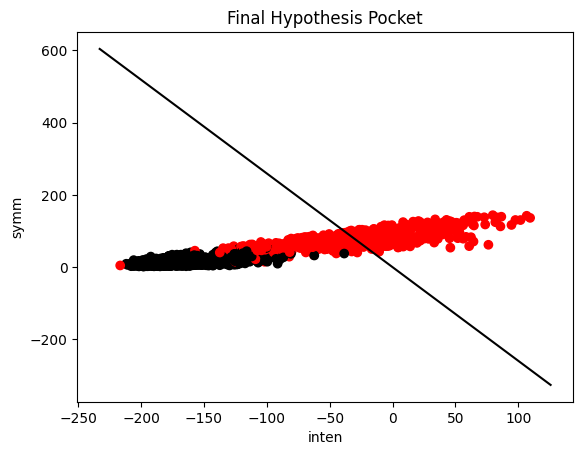

In [39]:
plt.scatter(training_data['inten'],training_data['symm'],c=clr,label=['1','-1'])
plt.xlabel('inten')
plt.ylabel('symm')

error,best_w=pocket(x,y,1000)
print("Total  missclassified: ",missclassified(best_w,x_test_data,y_test_data))
print(best_w)

## Task 3 LP 2

Total missclassified:  21


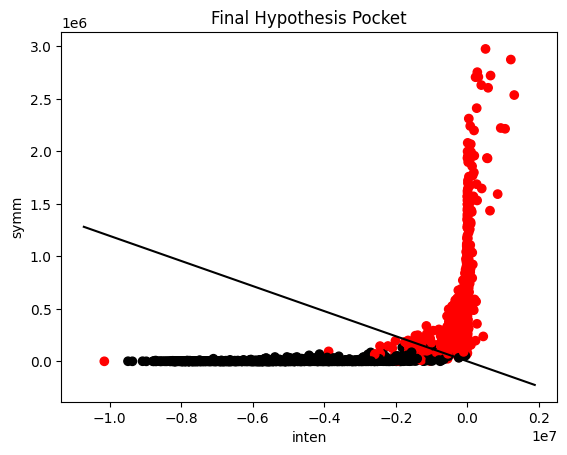

In [41]:
x_cubic=x**3
x_test_data_cube=x_test_data**3
plt.scatter(x_cubic[:,1],x_cubic[:,2],c=clr,label=['1','-1'])
plt.xlabel('inten')
plt.ylabel('symm')
error,w_pocket_digits=pocket(x_cubic,y,1000)
print('Total missclassified: ',missclassified(w_pocket_digits,x_test_data_cube,y_test_data))